# Pymaceuticals Inc.
---

### Analysis

#### Overview 
In this study, 249 mice who were identified with SCC tumors received treatment with a range of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.

#### Observations
1. Based on the 'Tumor Volume by Drug Regimen' box plot, Capomulin and Ramicane appear to be the most effective treatments in decreasing tumor size.
2. There is a positive correlation (coefficient 0.84) between mouse weight and average tumor volume: the larger the mouse is, the larger the average tumor volume is as well. 
3. Based on the 'Capomulin Regimen for Mouse ID: l509' chart, Capomulin was able to reduce the average tumor volume size 5 mm3 over 45 days. 

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
merge_df.head()

In [3]:
# Checking the number of mice.
merge_df['Mouse ID'].nunique()

249

In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = merge_df[merge_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Optional: Get all the data for the duplicate mouse ID g898. 
duplicate_mice = merge_df.loc[merge_df["Mouse ID"] == "g989", :]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [38]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_merge = merge_df.drop(duplicate_mice.index)
clean_merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [39]:
# Checking the number of mice in the clean DataFrame.
clean_merge_df['Mouse ID'].nunique()

248

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Assemble the resulting series into a single summary DataFrame using the aggregation method to produce the summary statistics in a single line
summary_stats = clean_merge_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(mean='mean',median='median',variance='var',std_dev='std',std_err='sem')

# Rename columns
summary_stats = summary_stats.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std_dev': 'Tumor Volume Std. Dev.',
    'std_err': 'Tumor Volume Std. Err'
})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

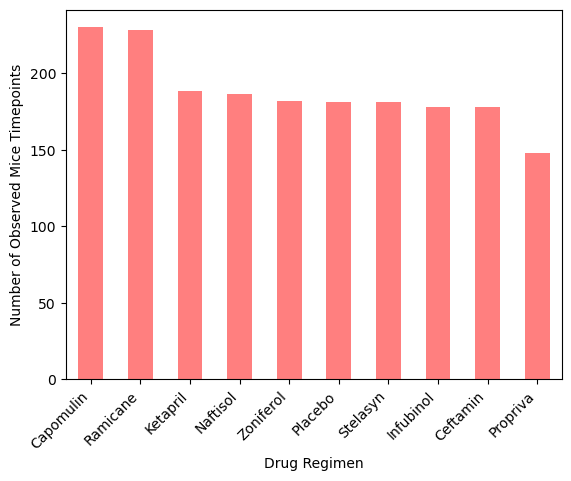

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Create a variable to track the Drug Regimen count for the x-axis
drug_regimen_counts = clean_merge_df['Drug Regimen'].value_counts()

# Create a bar plot using Pandas
drug_regimen_counts.plot(kind='bar', color='r',align='center', alpha=0.5)

# Customize the plot
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mice Timepoints')
plt.xticks(rotation=45, ha='right')

#Display the plot
plt.show()

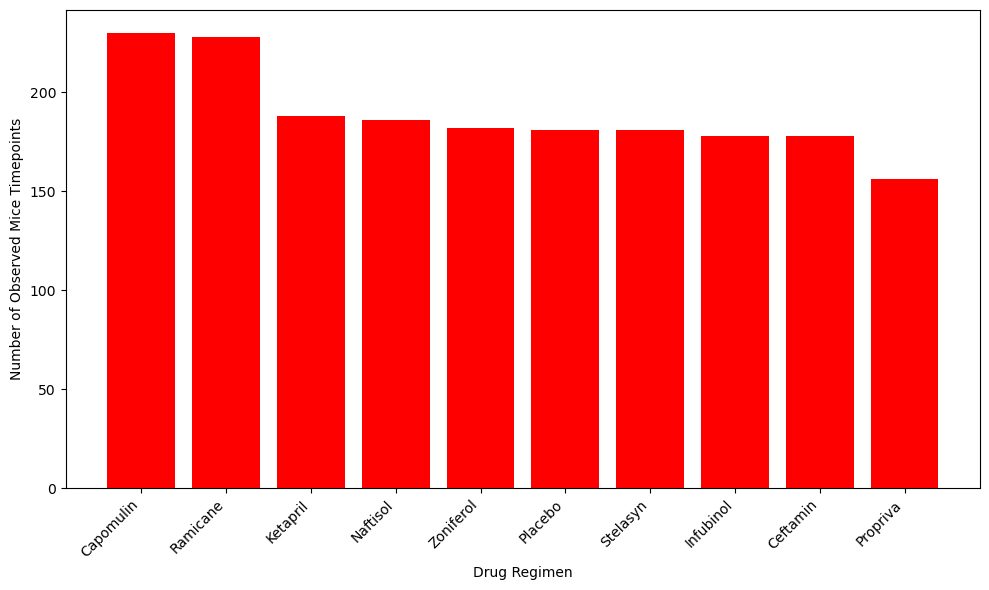

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = clean_merge_df['Drug Regimen'].value_counts()

# Create a bar plot using pyplot
plt.figure(figsize=(10,6))
plt.bar(drug_regimen_counts.index, drug_regimen_counts, color='r',)           

# Customize the plot
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mice Timepoints')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

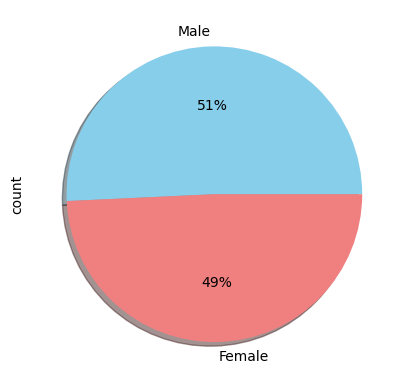

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distribution = clean_merge_df['Sex'].value_counts().round()

# Labels for the male vs. female distribution
mylabels = ["Male","Female"]

# The colors of each sectin of the pie chart
mycolors = ['skyblue','lightcoral']

# Display the pie plot
sex_distribution.plot(kind='pie',autopct='%1.f%%',colors=mycolors,labels=mylabels,shadow=True)

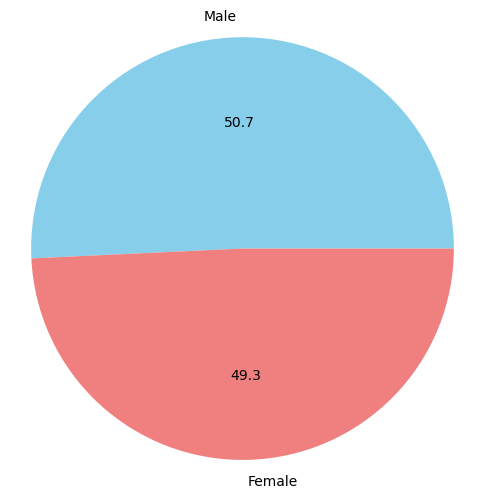

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_distribution = clean_merge_df['Sex'].value_counts().round()

# Create a pie plot using pyplot
plt.figure(figsize=(6,6))
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f', colors=['skyblue','lightcoral'])

# Diplay the pie plot
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [40]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = filtered_df.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints, clean_merge, on=['Mouse ID', 'Timepoint'])
final_tumor_volume.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [51]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty lists to fill with tumor vol data (for plotting)
capomulin_tumor_data = []
ramicane_tumor_data = []
infubinol_tumor_data = []
ceftamin_tumor_data = []

# Start the for loop
for index, row in final_tumor_volume.iterrows():
    
    # Locate the rows which contain mice on each drug and get the tumor volumes. Add the subset to corresponding empty treatment list.
    if row["Drug Regimen"] == treatment_regimens[0]:
        capomulin_tumor_data.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatment_regimens[1]:
        ramicane_tumor_data.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatment_regimens[2]:
        infubinol_tumor_data.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatment_regimens[3]:
        ceftamin_tumor_data.append(row['Tumor Volume (mm3)'])
    
 # Add results to new dataframe
treatment_regimens = pd.DataFrame({
    treatment_regimens[0]: capomulin_tumor_data,
    treatment_regimens[1]: ramicane_tumor_data,
    treatment_regimens[2]: infubinol_tumor_data,
    treatment_regimens[3]: ceftamin_tumor_data,
})
    
# Print results for each regimen
treatment_regimens_df.head()

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078


In [79]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
outliers = []
    
# Locate the rows which contain mice on each drug and get the tumor volumes
for regimen, tumor_data in treatment_regimens_df.items():
        
    # Calculate quartiles and IQR
    quartiles = pd.Series(tumor_data).quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
        
    # Determine upper and lower bounds
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Identify potential outliers
    potential_outliers = [value for value in tumor_data if value < lower_bound or value > upper_bound]
        
    # Print results
    print(f"-----------------------")
    print(f"Regimen: {regimen}")
    print(f"IQR: {iqr}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Potential Outliers: {potential_outliers}")
        
# Print overall potential outliers
print(f"Overall Potential Outliers: {outliers}")

-----------------------
Regimen: Capomulin
IQR: 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Potential Outliers: []
-----------------------
Regimen: Ramicane
IQR: 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Potential Outliers: []
-----------------------
Regimen: Infubinol
IQR: 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Potential Outliers: [36.3213458]
-----------------------
Regimen: Ceftamin
IQR: 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Potential Outliers: []
Overall Potential Outliers: []


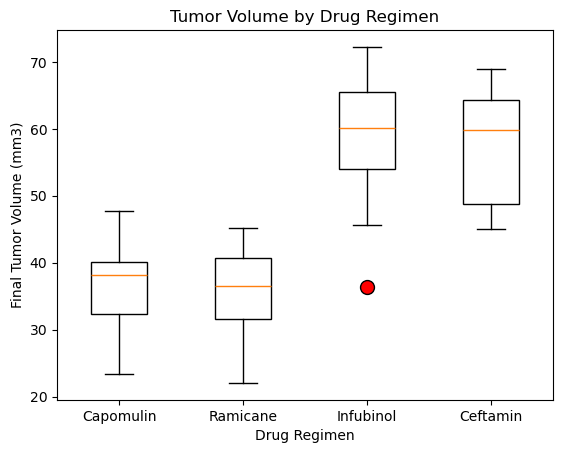

In [87]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatment_regimens = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create a list to store tumor volume data for each treatment group
plot_list = [
    treatment_regimens_df[treatment_regimens[0]], 
    treatment_regimens_df[treatment_regimens[1]],
    treatment_regimens_df[treatment_regimens[2]],
    treatment_regimens_df[treatment_regimens[3]]
]

# Style outlier
outliers = dict(marker='o', markerfacecolor='red', markersize=10)

# Create a box plot
fig1, ax = plt.subplots()
ax.boxplot(plot_list, patch_artist=True, boxprops=dict(facecolor='white'), showmeans=False, flierprops=outliers)

# Customize the plot
plt.title('Tumor Volume by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1,2,3,4], treatment_regimens)

# Show the plot
plt.show()

## Line and Scatter Plots

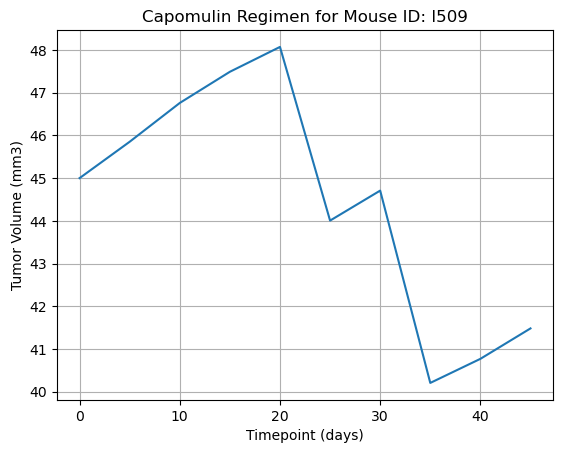

In [100]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin. Mouse ID is replaceable.
capomulin_mouse_id = 'l509'

# Grab data for mouse ID
capomulin_mouse_data = clean_merge.loc[
    (clean_merge['Drug Regimen'] == 'Capomulin') & (clean_merge['Mouse ID'] == capomulin_mouse_id)
]

# Create the plot
plt.figure
plt.plot(capomulin_mouse_data['Timepoint'], capomulin_mouse_data['Tumor Volume (mm3)'])

# Add labels and title
plt.title(f'Capomulin Regimen for Mouse ID: {capomulin_mouse_id}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.grid(True)
plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

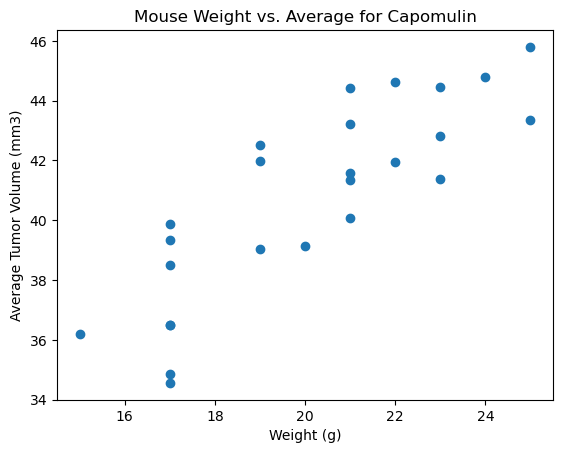

In [125]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_mouse_data = clean_merge[clean_merge['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_by_mouse = capomulin_mouse_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge average tumor volume with mouse metadta to get weight
capomulin_average = pd.merge(average_tumor_by_mouse, mouse_metadata, on='Mouse ID')

# Create the scatter plot
plt.figure
plt.scatter(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'], alpha=1)

# Add labels, title, and show plot
plt.title('Mouse Weight vs. Average for Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

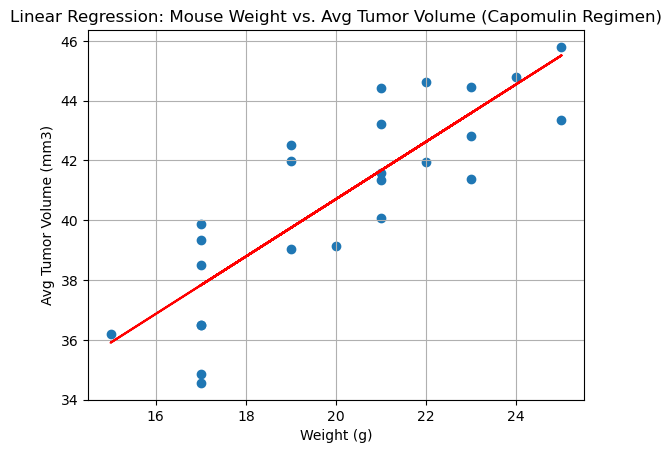

Correlation Coefficient: 0.84
The linear regression is y = 0.96x + 21.49


In [124]:
# Calculate the correlation coefficient and a linear regression model for 
# mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
correlation_coefficient = capomulin_average['Weight (g)'].corr(capomulin_average['Tumor Volume (mm3)'])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(capomulin_mouse_data['Weight (g)'], capomulin_mouse_data['Tumor Volume (mm3)'])

# Create a linear regression line
regression_line = slope * capomulin_average['Weight (g)'] + intercept

# Plot the data points and regression line
plt.figure
plt.scatter(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'], alpha=1)
plt.plot(capomulin_average['Weight (g)'], regression_line, color='red')
plt.title('Linear Regression: Mouse Weight vs. Avg Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.grid(True)
plt.show()

# Print the correlation and linear regression
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")

# Print linear regression
print(f"The linear regression is y = {slope:.2f}x + {intercept:.2f}")